<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 20, 2018: cleanup, `sin` and `cos` $g$ polys
<br>November 16 and 18, 2016: classic $g$ polys
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Stirling array $\mathcal{S}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha

init_printing()

In [2]:
%run ../../src/matrix_functions.py
%run ../../src/sequences.py

# Stirling array $\mathcal{S}$

In [3]:
from sympy.functions.combinatorial.numbers import stirling

In [4]:
m=8

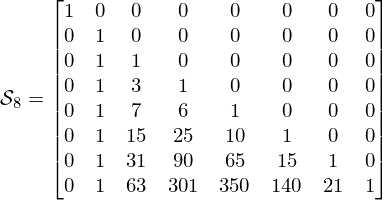

In [8]:
S2 = define(let=Symbol(r'\mathcal{{S}}_{{ {} }}'.format(m)), 
            be=Matrix(m, m, lambda n,k: stirling(n,k, kind=2)))
S2 # this version is the pure one

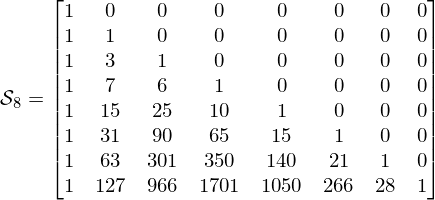

In [16]:
S2 = define(let=Symbol(r'\mathcal{{S}}_{{ {} }}'.format(m)), 
            be=Matrix(m, m, riordan_matrix_exponential(
                riordan_matrix_by_convolution(d=Eq(Function('d')(z), exp(z)),
                                              h=Eq(Function('h')(z), exp(z)-1),
                                              dim=m))))
S2

In [17]:
inspect(S2.rhs)

nature(is_ordinary=False, is_exponential=True)

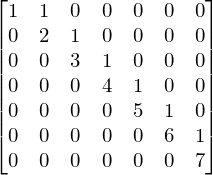

In [18]:
production_matrix(S2.rhs)

In [19]:
eigendata = spectrum(S2)
eigendata

In [20]:
data, eigenvals, multiplicities = eigendata.rhs

In [21]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

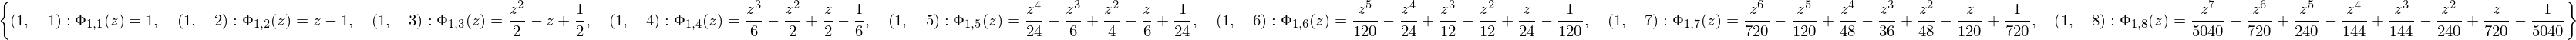

In [22]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

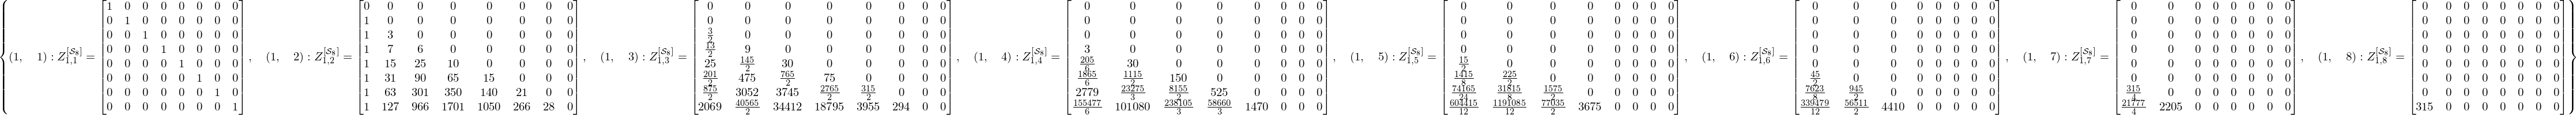

In [23]:
cmatrices = component_matrices(S2, Phi_polynomials)
cmatrices

## `power` function

In [29]:
f = Function('P')
f_power = define(let=f(z), be=z**r)
f_power

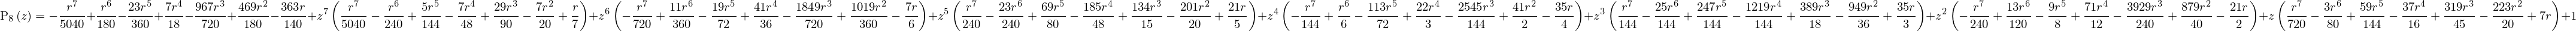

In [30]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials)
g_power = g_power.subs(eigenvals)
g_power

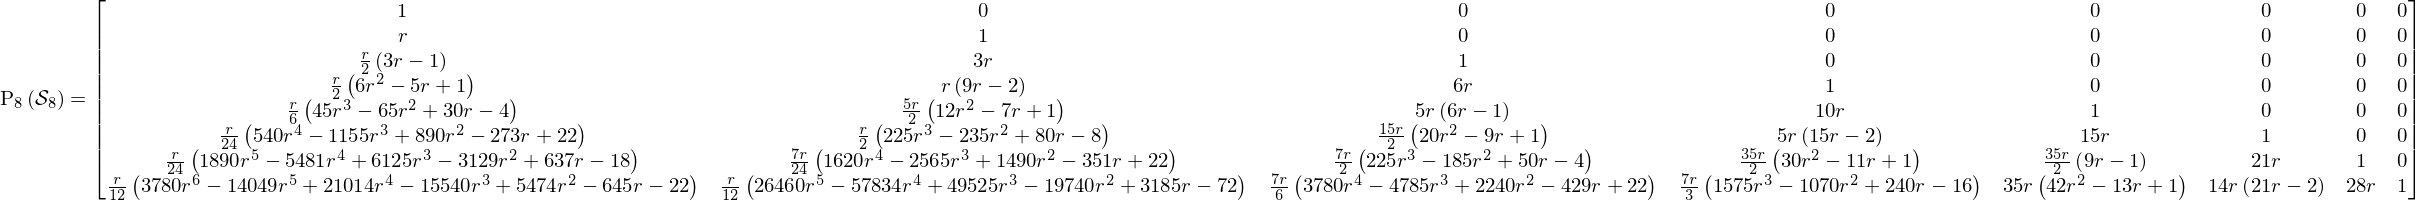

In [31]:
with lift_to_matrix_function(g_power) as G_power:
    S2_power = G_power(S2)
S2_power

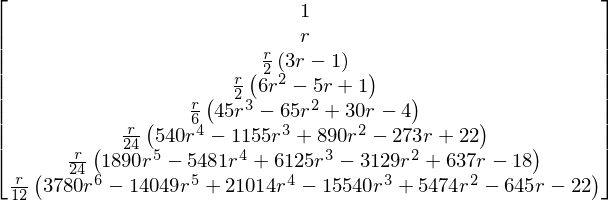

In [80]:
S2_power.rhs[:,0]

In [32]:
assert (S2.rhs**r).applyfunc(simplify) == S2_power.rhs

## `inverse` function

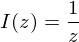

In [24]:
f = Function('I')
f_inverse = define(let=f(z), be=1/z)
f_inverse

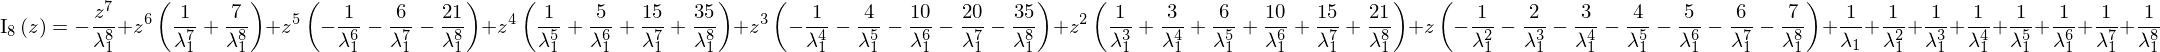

In [25]:
g_inverse = Hermite_interpolation_polynomial(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [26]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

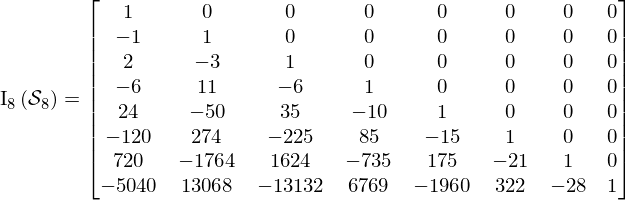

In [27]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    S2_inverse = G_inverse(S2)
S2_inverse

In [35]:
assert S2_inverse.rhs*S2.rhs == Matrix(m, m, identity_matrix())
assert S2_inverse.rhs == S2_power.rhs.subs({r:-1})

## `sqrt` function

In [36]:
f = Function('R')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

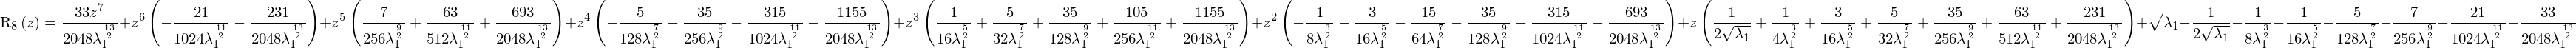

In [37]:
g_sqrt = Hermite_interpolation_polynomial(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

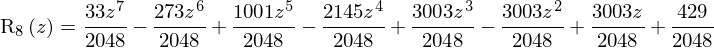

In [38]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

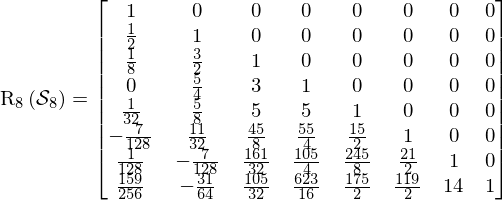

In [39]:
with lift_to_matrix_function(g_sqrt) as G_sqrt:
    S2_sqrt = G_sqrt(S2)
S2_sqrt

In [40]:
inspect(S2_sqrt.rhs)

nature(is_ordinary=False, is_exponential=True)

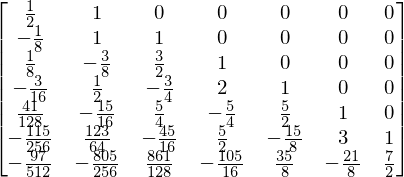

In [41]:
production_matrix(S2_sqrt.rhs)

In [43]:
assert S2_sqrt.rhs == S2.rhs**(S(1)/2)
assert S2_sqrt.rhs == S2_power.rhs.subs({r:S(1)/2})

## `expt` function

In [44]:
f = Function('E')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

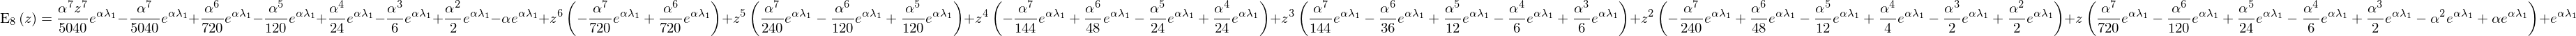

In [45]:
g_expt = Hermite_interpolation_polynomial(f_expt, eigendata, Phi_polynomials)
g_expt

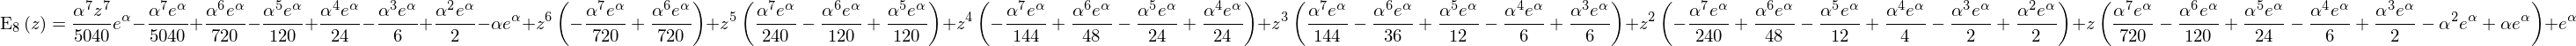

In [46]:
g_expt = g_expt.subs(eigenvals)
g_expt

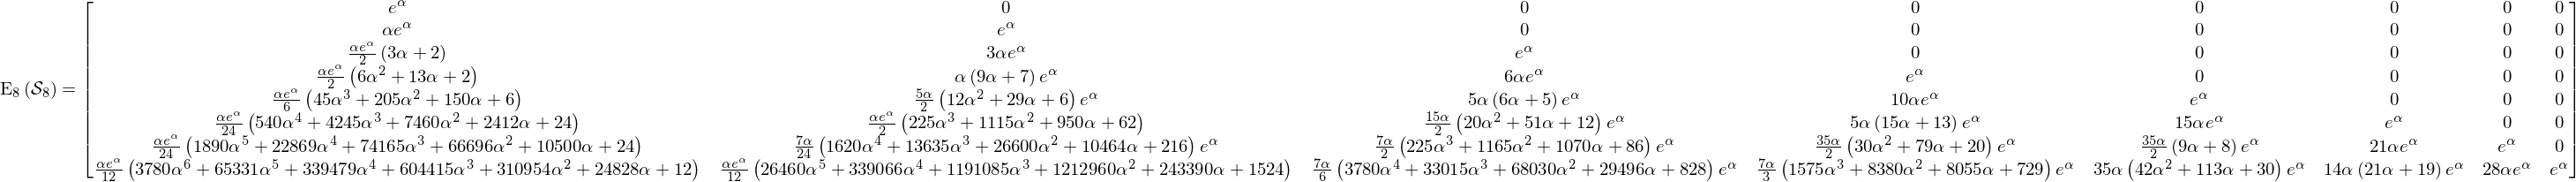

In [63]:
with lift_to_matrix_function(g_expt) as G_expt:
    S2_expt = G_expt(S2)
S2_expt

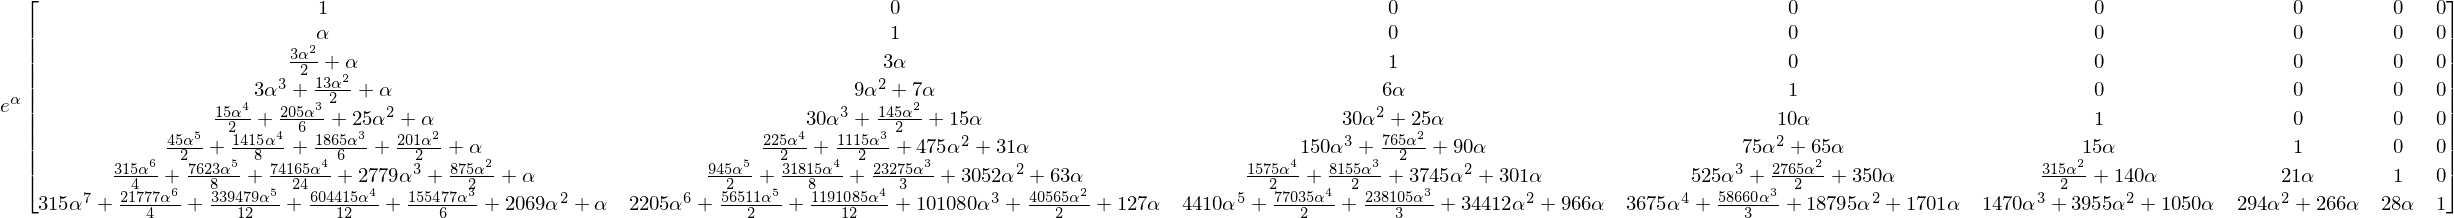

In [61]:
simp_S2_expt = Mul(exp(alpha), S2_expt.rhs.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_S2_expt

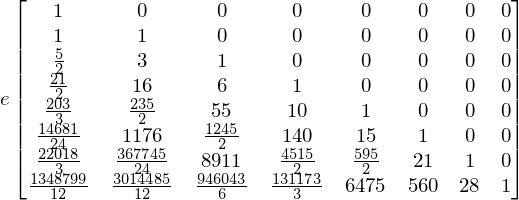

In [65]:
simp_S2_expt.subs({alpha:1})

In [66]:
inspect(simp_S2_expt.args[1])

nature(is_ordinary=False, is_exponential=False)

## `log` function

In [53]:
f = Function('L')
f_log = define(let=f(z), be=log(z))
f_log

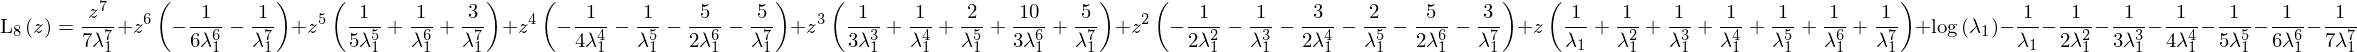

In [54]:
g_log = Hermite_interpolation_polynomial(f_log, eigendata, Phi_polynomials)
g_log

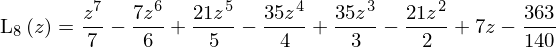

In [55]:
g_log = g_log.subs(eigenvals)
g_log

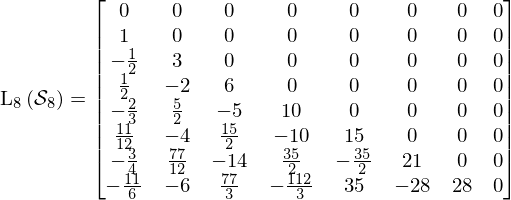

In [56]:
with lift_to_matrix_function(g_log) as G_log:
    S2_log = G_log(S2)
S2_log

## `sin` function

In [67]:
f = Function('S')
f_sin = define(let=f(z), be=sin(z))
f_sin

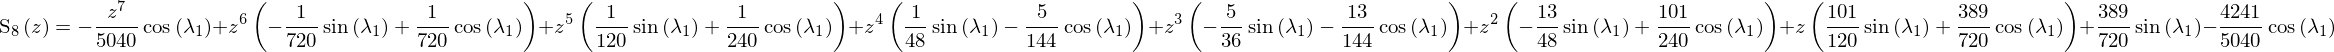

In [68]:
g_sin = Hermite_interpolation_polynomial(f_sin, eigendata, Phi_polynomials)
g_sin

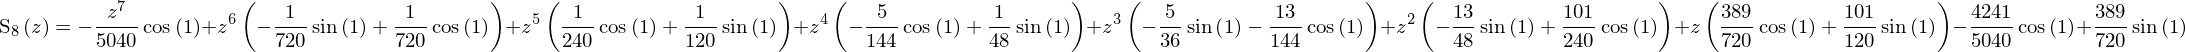

In [69]:
g_sin = g_sin.subs(eigenvals)
g_sin

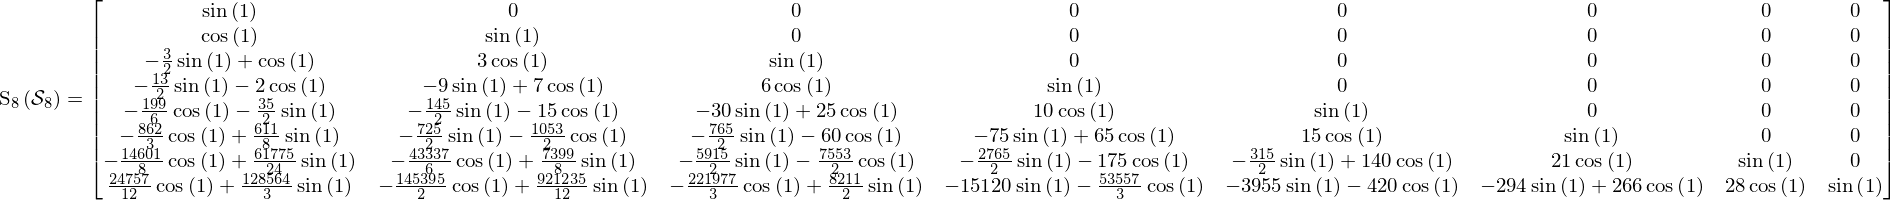

In [70]:
with lift_to_matrix_function(g_sin) as G_sin:
    S2_sin = G_sin(S2)
S2_sin

## `cos` function

In [72]:
f = Function('C')
f_cos = define(let=f(z), be=cos(z))
f_cos

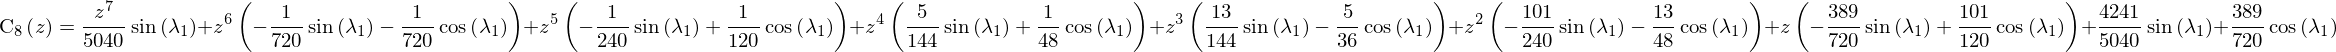

In [73]:
g_cos = Hermite_interpolation_polynomial(f_cos, eigendata, Phi_polynomials)
g_cos

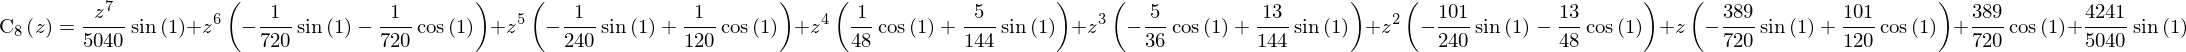

In [74]:
g_cos = g_cos.subs(eigenvals)
g_cos

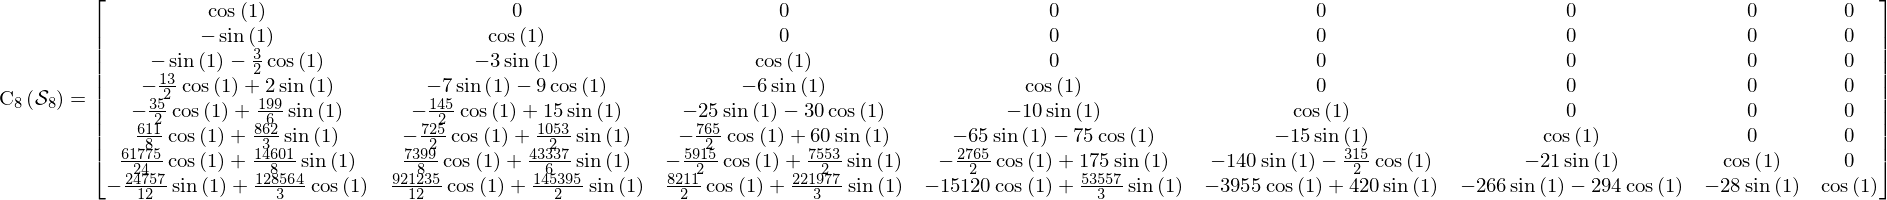

In [75]:
with lift_to_matrix_function(g_cos) as G_cos:
    S2_cos = G_cos(S2)
S2_cos

In [77]:
assert (S2_sin.rhs**2 + S2_cos.rhs**2).applyfunc(trigsimp) == Matrix(m, m, identity_matrix())

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.